In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##############  1.1
 
data = pd.read_csv('houses.csv', delimiter=",", header = 0)
print(data.describe(include='all'))
df= data.as_matrix()
Y= df[:,0]
X= df[:,1:]
x_1= X[:,3]

r =1000

       price (grands)      bedrooms     bathrooms   sqft_living      sqft_lot  \
count    21613.000000  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean       540.088142      3.370842      2.114757   2079.899736  1.510697e+04   
std        367.127196      0.930062      0.770163    918.440897  4.142051e+04   
min         75.000000      0.000000      0.000000    290.000000  5.200000e+02   
25%        321.950000      3.000000      1.750000   1427.000000  5.040000e+03   
50%        450.000000      3.000000      2.250000   1910.000000  7.618000e+03   
75%        645.000000      4.000000      2.500000   2550.000000  1.068800e+04   
max       7700.000000     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517

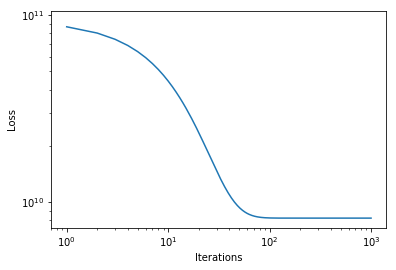

()

In [2]:
############ 1.2

l= 0.000000000000001
def linear_regression(X1,Y1,lr,repetition):
    w1=[0.05]
    w2=[-1]
    L=[]
    for i in range(0,repetition):
        y=w1[-1]*X1+w2[-1]
        w1.append(w1[-1]-lr*sum((y-Y1)*X1))
        w2.append(w2[- 1]-lr*sum(y-Y1))
        L.append(sum((y-Y1)**2))
    plt.loglog(L)
    plt.xlabel('Iterations'); plt.ylabel('Loss')
    plt.show()
    return();

linear_regression(x_1,Y,l,r)

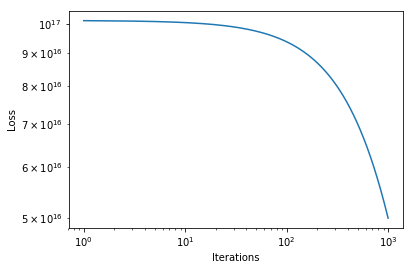

In [7]:
########### 1.2
l= 0.00000000000000001

def linear_regressionX(X1,Y1,lr,repetition):
    w1=np.array([0.05,-1,-1,0.05,-1,0.5,-1,-1,-1,0.05,-1,0.75,-1,0.05,-1])
    w2=np.array([-1])
    L=np.array([])
    for i in range (0,repetition):
        y=np.dot(X1,w1)+w2
        w1=w1-lr*np.dot((y-Y1),X1)
        w2=w2-lr*(y-Y1)
        L=np.append(L,np.dot(sum(y-Y1),sum(y-Y1)))
    plt.loglog(L)
    plt.xlabel('Iterations'); plt.ylabel('Loss')
    plt.show()
linear_regressionX(X,Y,l,r)

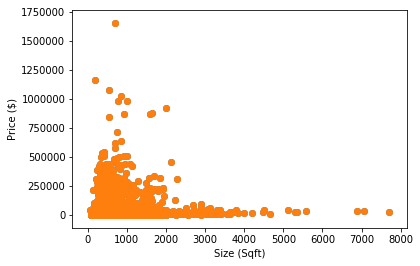

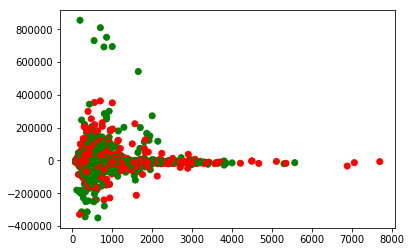

In [12]:
########### 1.3

plt.scatter(Y,x_1)
plt.xlabel('Size (Sqft)'); plt.ylabel('Price ($)')
plt.show()

w1=np.array([-1,-1,-1,0.75,-1,-0.5,-1,-1,-1,0.05,-1,0.75,-1,-1,-1])
w2=np.array([-1])
y=np.dot(X,w1)+w2

plt.scatter(Y,y,color=["red","green"])
plt.show()

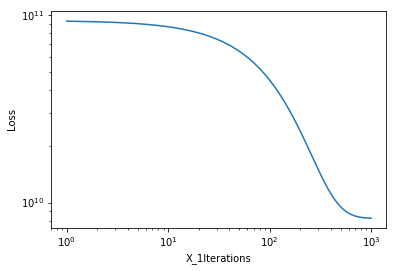

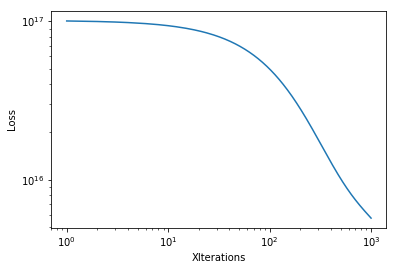

In [9]:
##########1.4
l= 0.0000000000000001
g=0.000000000001

def linear_regression_Ridgex_1(X1,Y1,lr,repetition):
    w1=[0.05]
    w2=[-1]
    #g=0.000000000001
    L=[]
    for i in range(0,repetition):
        y=w1[-1]*X1+w2[-1]
        w1= np.append(w1,(1-2*lr*g)*w1[-1]-lr*sum((y-Y1)*X1))
        w2.append(w2[- 1]-lr*sum(y-Y1))
        L.append(sum((y-Y1)**2))
    plt.loglog(L)
    plt.xlabel('X_1Iterations'); plt.ylabel('Loss')
    plt.show()
    return(L);   
    
def linear_regression_RidgeX(X1,Y1,lr,repetition):
    w1=np.array([0.05,-1,-1,0.05,-1,0.5,-1,-1,-1,0.05,-1,0.75,-1,0.05,-1])
    w2=np.array([-1])
    L=np.array([])
    for i in range (0,repetition):
        y=np.dot(X1,w1)+w2
        temp = 1-2*lr*g
        w1=temp*w1-lr*np.dot((y-Y1),X1)
        w2=w2-lr*(y-Y1)
        L=np.append(L,np.dot(sum(y-Y1),sum(y-Y1)))
    plt.loglog(L)
    plt.xlabel('XIterations'); plt.ylabel('Loss')
    plt.show()

linear_regression_Ridgex_1(x_1,Y,l,r)
linear_regression_RidgeX(X,Y,l,r)

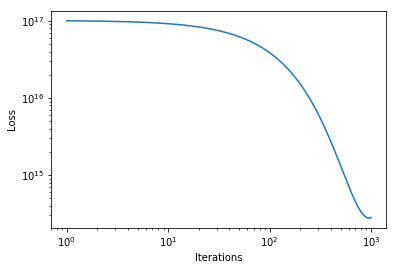

In [21]:
##########1.5
l= 0.000000000000000001
m=0.005

def linear_regression_Ridgex_1_Momentum(X1,Y1,lr,repetition):
    w1=np.array([0.05])
    w2=np.array([-1])
    L=np.array([])
    for i in range(0,repetition):
        y=w1[-1]*X1+w2[-1]
        deltaw1 = -(lr*np.dot((y-Y1),X1) + m*w1)
        w1= np.append(w1,w1 + deltaw1)
        deltaw2 = -lr*sum(y-Y1) + m*w2
        w2 = np.append(w2,(w2 + deltaw2))
        L = np.append(L,sum((y-Y1)**2))
    plt.loglog(L)
    plt.xlabel('X_1Iterations'); plt.ylabel('Loss')
    plt.show()
    return(L);   
    
def linear_regression_RidgeX_Momentum(X1,Y1,lr,repetition):
    w1=np.array([0.05,-1,-1,0.05,-1,0.5,-1,-1,-1,0.05,-1,0.75,-1,0.05,-1])
    w2=np.array([-1])
    L=np.array([])
    for i in range (0,repetition):
        y=np.dot(X1,w1)+w2
        deltaw1 = -(lr*np.dot((y-Y1),X1) + m*w1)
        w1 = w1 + deltaw1  
        deltaw2 = -lr*sum(y-Y1) + m*w2
        w2 = w2 + deltaw2
        L=np.append(L,np.dot(sum(y-Y1),sum(y-Y1)))
    plt.loglog(L)
    plt.xlabel('Iterations'); plt.ylabel('Loss')
    plt.show()

#####The code for linear_regression_Ridgex_1_Momentum is crashing the system, please don't run.
#linear_regression_Ridgex_1_Momentum(x_1,Y,l,r)

linear_regression_RidgeX_Momentum(X,Y,l,r)

In [ ]:
############## 1.6
def polynomial_regression_optimized(X1,Y1,lr):
    w1=[-1]
    w2=[-1]
    w3=[-1] 
    for i in range (0,1000):
        y= w1*np.dot(X1,X1) + w2*X1 + w3
        w1= w1-lr*X1
        w2= w2-lr*X1
        w3= w3-lr*X1 
        L=np.append(L,np.dot(sum(y-Y1),sum(y-Y1)))
    plt.loglog(L)
    plt.xlabel('Iterations'); plt.ylabel('Loss')
    plt.show()  
    plt.scatter(Y,x_1)
    plt.xlabel('Size (Sqft)'); plt.ylabel('Price ($)') 
    plt.show()
polynomial_regression_optimized(x_1,Y,l)

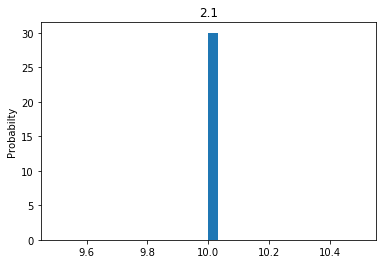

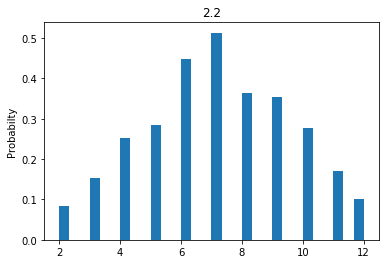

In [18]:
#################2.1 and 2.2

import numpy as np
import random
from random import *
import matplotlib.pyplot as plt
V=[]
D1=randint(1,6)
D2=randint(1,6)
V.append(D1+D2)
plt.hist(V,normed='true',bins=30)
plt.ylabel("Probabilty")
plt.title("2.1")
plt.show()

def RollingDice():
    V1=[]
    for i in range(0,1000):
        D1=randint(1,6)
        D2=randint(1,6)
        V1.append(D1+D2)
    plt.hist(V1,normed='true',bins=30)
    plt.ylabel("Probabilty")
    plt.title("2.2")
    plt.show()
    return;

    
RollingDice()

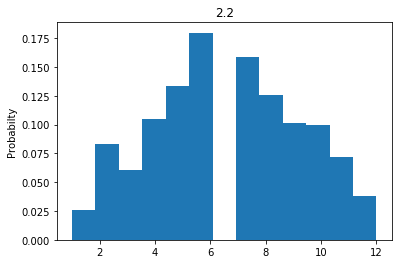

Probability of getting 7 as sum is 0.1388888888888889
Probability of getting 3 in the sum of 7 is 0.05555555555555555


In [19]:
########################2.3

def Prob():
    n,m, t=0,0, 0
    V2=[] 
    D1=[1,2,3,4,5,6]
    D2=[1,0,3,4,5,6]
    for i in range(0,1000):
        V2.append(np.random.choice(D1)+np.random.choice(D2))
    plt.hist(V2,normed='true',bins=13)
    plt.ylabel("Probabilty")
    plt.title("2.2")
    plt.show()
    
    for i in D1:
        for j in D2:
            if(i+j == 7):
                n=n+1
                if(i == 3 or j==3):
                    m=m+1
            t=t+1
    print("Probability of getting 7 as sum is",n/t)
    print("Probability of getting 3 in the sum of 7 is",m/t)
    return;

Prob()

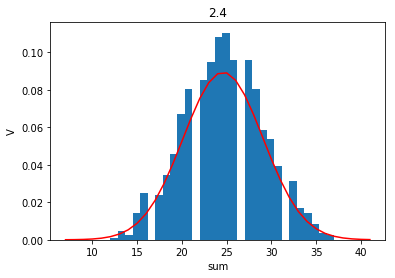

In [14]:
#################2.4

import math

V=[]
for i in range(0,1000):
    D1= randint(1,6)
    D2= randint(1,6)
    D3= randint(1,6)
    D4= randint(1,6)
    D5= randint(1,6)
    D6= randint(1,6) 
    D7= randint(1,6)
    V.append(D1+D2+D3+D4+D5+D6+D7)

mean = np.mean(V)
var = np.std(V)

x= range(7,42)

a= 1/(var*math.sqrt(2*3.147))

gauss = a*np.exp(-(x-mean)**2/(2*var**2))

plt.plot(x,gauss,'r')
plt.hist(V,normed='true',bins=30)
plt.ylabel("V")
plt.xlabel("sum")
plt.title("2.4")
plt.show()